In [ ]:
!pip install --upgrade category_encoders

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import category_encoders as ce

In [ ]:
ad_data = pd.read_csv('/content/advertising.csv')

In [ ]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [ ]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


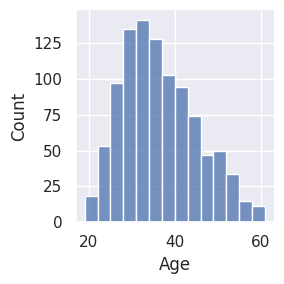

In [ ]:
sns.set_theme(style="darkgrid")
# df = sns.load_dataset("penguins")
sns.displot(
    ad_data.Age,
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

In [ ]:
# penguins = sns.load_dataset("penguins")
# sns.jointplot(data=penguins, x="bill_length_mm", y="bill_depth_mm")

In [ ]:
# penguins.head()

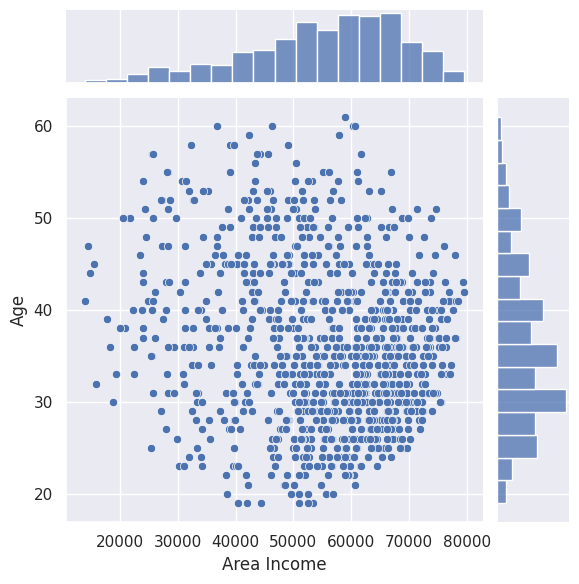

In [ ]:
# # penguins = sns.load_dataset("penguins")
sns.jointplot(data=ad_data, x="Area Income", y="Age")

<function matplotlib.pyplot.show(close=None, block=None)>

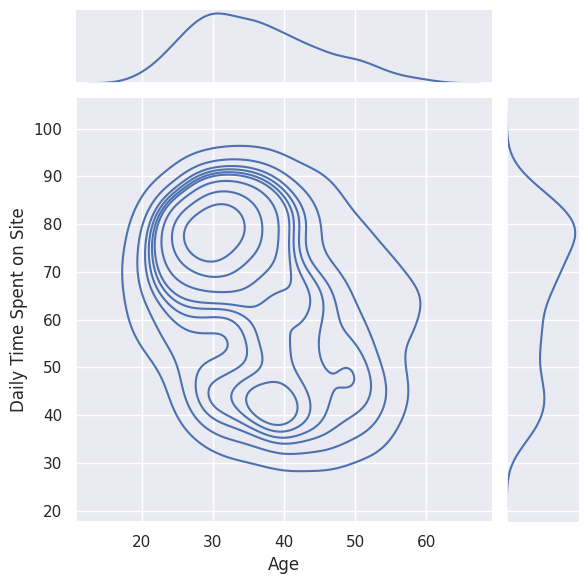

In [ ]:
# sns.jointplot(data= ad_data , x="Daily Time Spent on Site	", y="Age")
sns.jointplot(data=ad_data, x="Age", y="Daily Time Spent on Site" , kind="kde")
plt.show

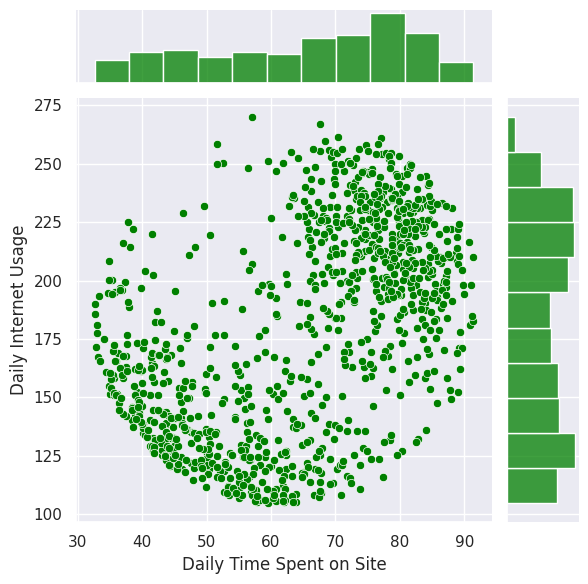

In [ ]:
sns.jointplot(data=ad_data, x="Daily Time Spent on Site", y="Daily Internet Usage" , color="green")

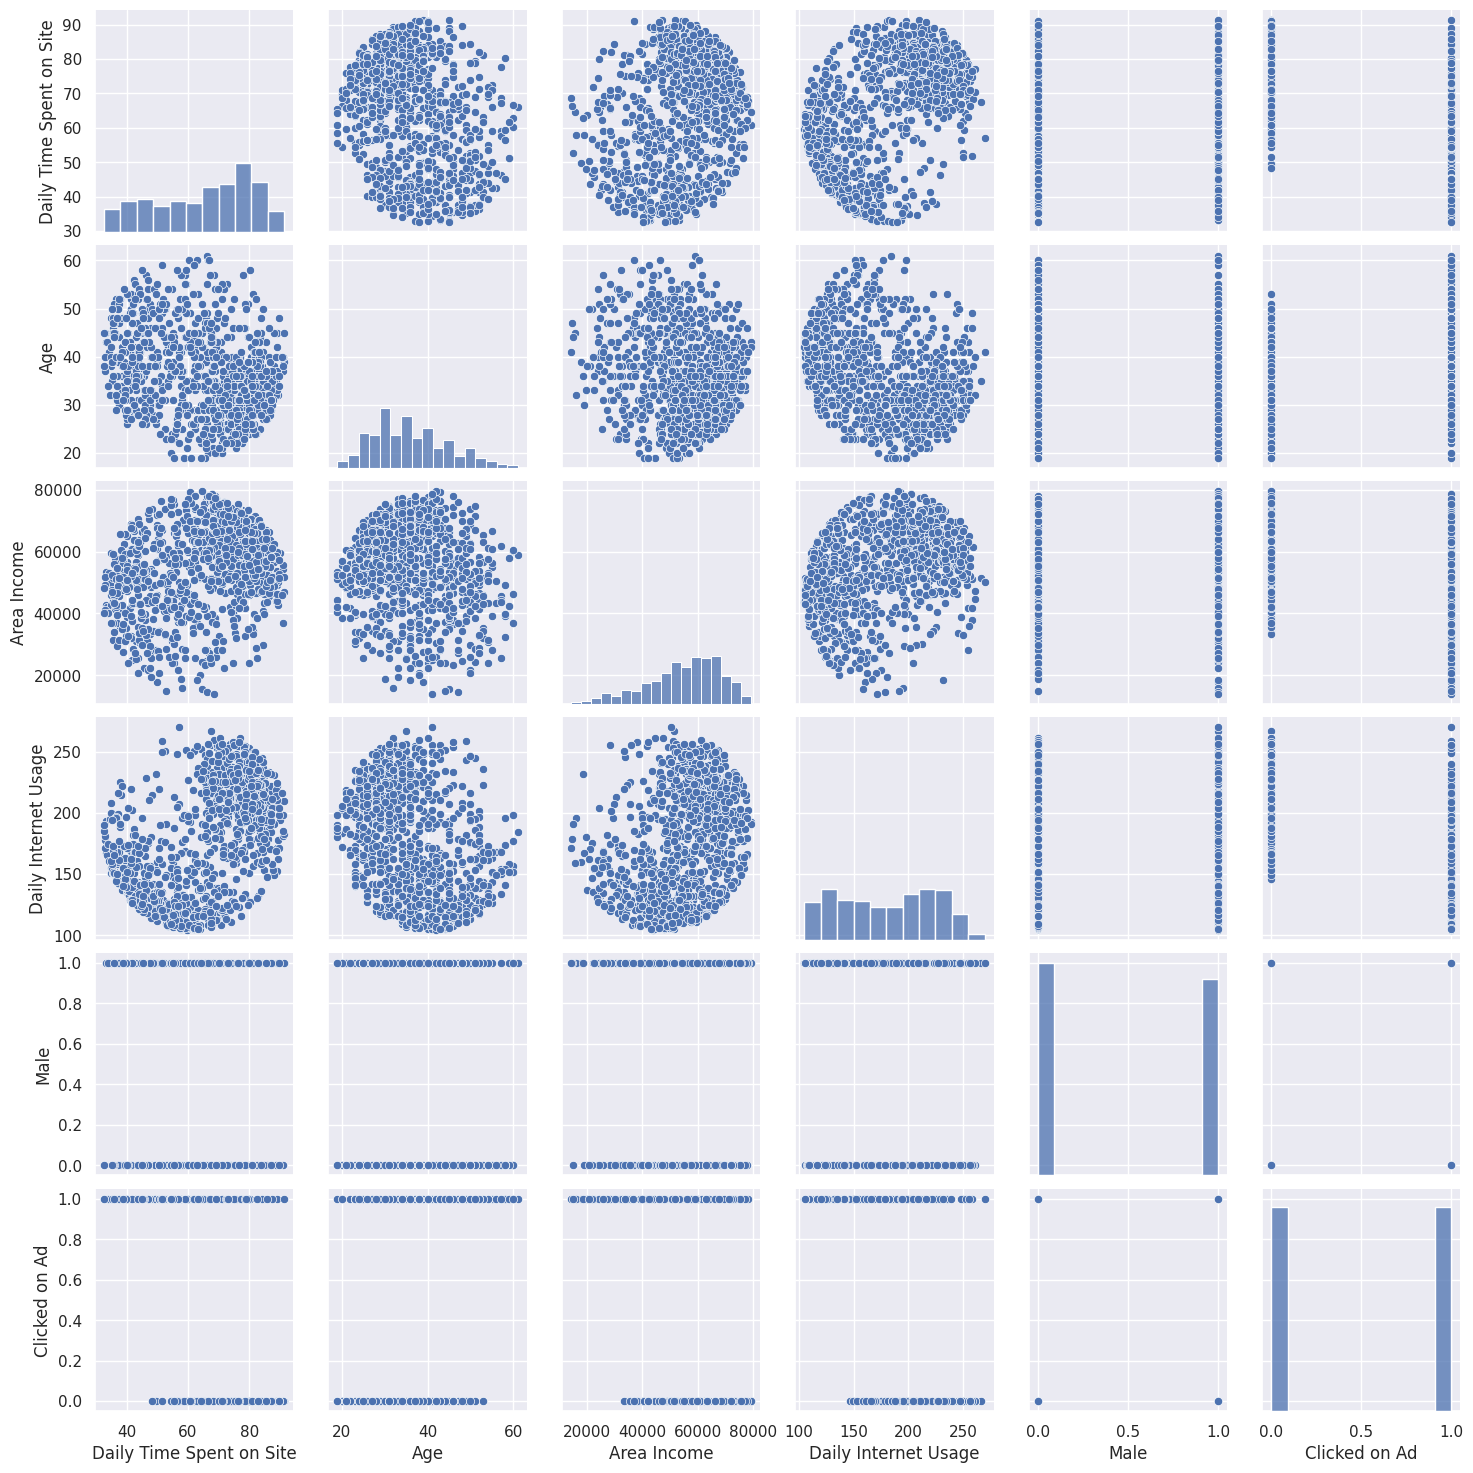

In [ ]:
# penguins = sns.load_dataset("penguins")
sns.pairplot(ad_data)
# sns.pairplot(ad_data, hue='Clicked on Ad')

In [ ]:
y = ad_data['Clicked on Ad']
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [ ]:
ad_data.drop(columns='Clicked on Ad' , inplace=True)
X = ad_data.copy()
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18
...,...,...,...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,Fundamental modular algorithm,Duffystad,1,Lebanon,2016-02-11 21:49:00
996,51.30,45,67782.17,134.42,Grass-roots cohesive monitoring,New Darlene,1,Bosnia and Herzegovina,2016-04-22 02:07:01
997,51.63,51,42415.72,120.37,Expanded intangible solution,South Jessica,1,Mongolia,2016-02-01 17:24:57
998,55.55,19,41920.79,187.95,Proactive bandwidth-monitored policy,West Steven,0,Guatemala,2016-03-24 02:35:54


In [ ]:
# ad_data.isnull().sum()
# ad_data['Ad Topic Line'].value_counts()
# ad_data['Country'].value_counts()

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
x_train.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp
29,76.02,22,46179.97,209.82,Business-focused value-added definition,West Guybury,0,Bouvet Island (Bouvetoya),2016-01-27 12:38:16
535,78.76,32,70012.83,208.02,Managed attitude-oriented Internet solution,East Valerie,1,Uruguay,2016-04-20 10:04:29
695,73.49,38,67132.46,244.23,Organic 3rdgeneration encryption,Mosleyburgh,0,Vanuatu,2016-02-14 11:36:08
557,79.67,28,58576.12,226.79,Total grid-enabled application,Charlesbury,0,Comoros,2016-07-20 01:56:33
836,49.21,46,49206.40,115.60,Realigned 24/7 core,Carterland,0,Mexico,2016-02-28 03:34:35


In [ ]:
lr_model = LogisticRegression()

In [ ]:
encoder = ce.OrdinalEncoder(cols=['Ad Topic Line', 'City' , 'Country' , 'Timestamp' ])

In [ ]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 29 to 102
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  800 non-null    float64
 1   Age                       800 non-null    int64  
 2   Area Income               800 non-null    float64
 3   Daily Internet Usage      800 non-null    float64
 4   Ad Topic Line             800 non-null    object 
 5   City                      800 non-null    object 
 6   Male                      800 non-null    int64  
 7   Country                   800 non-null    object 
 8   Timestamp                 800 non-null    object 
dtypes: float64(3), int64(2), object(4)
memory usage: 62.5+ KB


In [ ]:
x_train.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp'],
      dtype='object')

In [ ]:
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)

In [ ]:
lr_model.fit(x_train , y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
y_pred = lr_model.predict(x_test)